# Part 1
    
## Theory Questions
### K Nearest Neighboor Classifications

#### 1. Let k-NN(S) be the k Nearest Neighbor classification algorithm on sample set S,which takes the majority of the closest k points where there are 2 classes (positive and negative).
        
a) Show that if in both 1-NN(S1) and 1-NN(S2) the label of point x is positive,then in 1-NN(S1 ∪ S2) the label of x is positive.
        




1-NN($S_1 \cup S_2$) has to be either in set $S_1$ or set $S_2$ since it is union of these set. If it is in $S_1$ then it is also 1-NN($S_1$) because otherwise, there would be a contradiction simply because that implies 1-NN($S_1 \cup S_2$) has two values at the same time. This can be also said for 1-NN($S_2$). These conclusions brings up the fact that 1-NN($S_1 \cup S_2$) is either 1-NN($S_1$) or 1-NN($S_2$). If both of them are positive, then 1-NN($S_1 \cup S_2$) has to be positive.

b) Show an example such that in both 3-NN(S1) and 3-NN(S2) the label of x ispositive, and in 3-NN(S1 ∪ S2) the label of x is negative.
           


Below, there is an example of this. Yellow one is the x. Blues represents positive and reds represents negative. In this example,
3-NN(S1) and 3-NN(S2) is positive whereas 3-NN(S1US2) is negative.
<img src="example.png" width="1000" height="500">

#### 2.One of the problems with k-nearest neighbor learning is selecting a value for k. Say you are given the following data set. This is a binary classification task in which the instances are described by two real-valued attributes. 

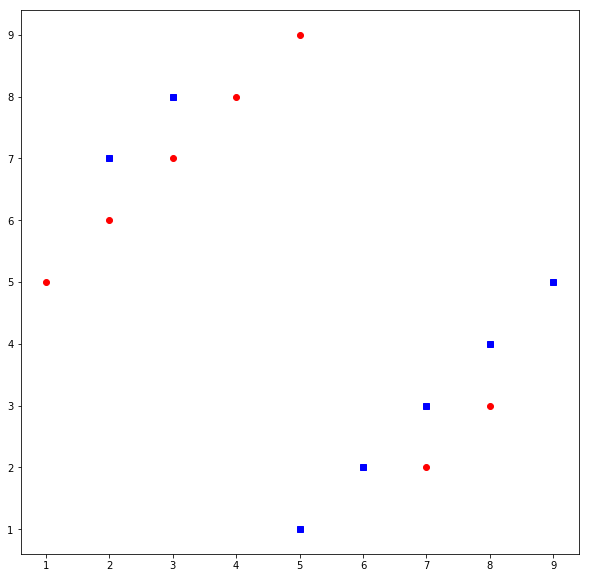

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (10,10))
x1 = [1,2,3,4,5,7,8]
y1 = [5,6,7,8,9,2,3]
x2 = [2,3,5,6,7,8,9]
y2 = [7,8,1,2,3,4,5]
plt.plot(x1,y1,"ro",x2,y2,"bs")
plt.show()

a)What value of k minimizes training set error for this data set, and what is
the resulting training set error? Why is training set error not a reasonable estimate of test set error, especially given this value of k?

k that minimizes training set error is 1 since it would be just itself. Error in this case would be zero.
Training set error would not be reasonable estimate of set error because it would be too much biased. When k is equal to 1
training set error would always be zero but it does not give any info about the models accuracy.

b) What value of k minimizes the leave-one-out cross-validation error for this data set, and what is the resulting error? 
Why is cross-validation a better measure of test set performance?

k = 5 minimizes the leave-one-out cross-validation error for this data set. Resulting error is 4 since 4 data point on this set
wouldn't predicted correctly when k is equal to 5. Cross validation is a better measure because it discards the effect of the data we are predicting to the model and gives a better idea about our choice of parameters.
    

c) Why might using too large values k be bad in this dataset? Why might too small values of k also be bad?

Using too large values for k would make our model to take the furthest points to consideration even tough they are far away from our point.
this would increase our cross-validation error. Taking k too small would make us give more priority to noisy data. This would also increase our cross-validation error.

d) Sketch the 1-nearest neighbor decision boundary for this dataset.

It would be the lines f(x) = x + 4.5, f(x) = x and f(x) = x - 4.5 since data points on this lines have equal distance to each class. These lines are illustrated below.

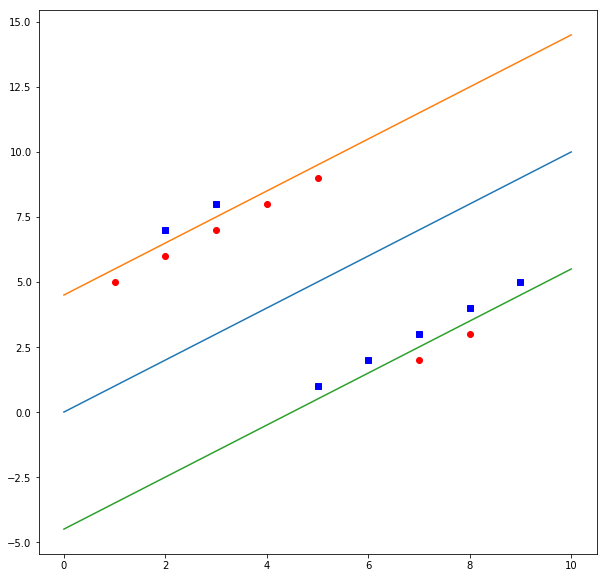

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.pyplot import figure 
figure(figsize = (10,10))
x1 = [1,2,3,4,5,7,8]
y1 = [5,6,7,8,9,2,3]
x2 = [2,3,5,6,7,8,9]
y2 = [7,8,1,2,3,4,5]
x = np.linspace(0,10)
plt.plot(x1,y1,"ro",x2,y2,"bs",x,x,x,x+4.5,x,x-4.5)

### Linear Regression

1. Suppose you have m=23 training examples with n=5 features (excluding the additional all-ones feature for the bias term, which you should add). The closed form solution is $\theta = (X^T X)^{-1}X^T y$. For the given values of m and n,
what are the dimensions of X, y, $\theta$ in this equation?

Dimensions of X is (23,5). Dimensions of y is (23,1) and dimensions of $\theta$ is (5,1)

2.Suppose you have m=50 training examples which are represented with n=200,000
dimensional feature vectors. You want to use multivariate linear regression to fit
paremeters $\theta$ to our data. Should you prefer gradient descent or the closed form
solution?

There are very few sample points on this training set. Therefore, it can be said that this data can't represent the relationship between an element and target. Therefore, it would be better to have some varience in our model in order to prevent bias. For this, I would prefer gradient descent hoping that it would converges to a local optima, thus, creating varience in the model.

3. Which of the following are valid reasons for using feature scaling?

Answers are:


a) It speeds up solving for θ using the normal equation. The question above is an example to this

c) It speeds up gradient descent by making it require fewer iterations to get to
a good solution.

# Part 2
## Book Recomendation system
### Owerwiew of the Problem

 Recommandation systems have a great influence in our daily life. There are many popular applications such as netflix or spotify that uses recomendation systems. In this homework, our aim is to create a book recomendation sytem based on k-nearest neighboor and weighted k-nearest neighboor approaches. For this, we will use user based collobrative filtering. 
 Collaborative filtering based systems collect and analyze users’ behavioral information in
the form of their feedback, ratings, preferences and activities. Based on this information,
these systems then exploit similarities amongst several users/ items to predict missing
ratings and hence make suitable recommendations.
    We have three data files which are the data of users charachteristics(such as age), the data of books(isbn, publisher etc.) and the data of the ratings.
 However, In my implementation of the problem i only considered ratings data.
    
 
### Data Set
 Data set consists of 3 csv files. These files are for user information, book information and ratings.  
#### User Information
User information has three columns which are user id, location, and age respectively. We are expected to take consideration the users only have locations that contain "usa" or "canada". In my implementation, I actually didn't need the information of age and location but I take it to user class regardless. I did this because I wanted to be able improve my algorithm with respect to these values.
#### Book Information
Book information consists of eight columns. First five column are isbn, book tittle, book author, year of publication and publisher respectively. Last three fields are some image URL's for given books. I haven't even used this information in my homework. I think it would only be helpful if I needed to display book information or some kind of neccesity of that nature.
#### Rates Information
Rates Information consists of three columns which are user id, isbn and rate. Rates has to be between are between 0-10 but I have only used rates between 1-10 because my algorithm assumes that a book that hasn't read would take the value of 0.





## Algorithm
We are expected to estimate pur predictions with respect to K-NN algorithm and wiighted K-NN algorithm
### K-NN Algorithm

All users in the data set can be represented as vectors where i'th element of the users vector is the users rate to the i'th book. Then, it is possible to find a similarity between users using eqautions such as cosine similarity. Once we find similarities of a user with respect to train data, we can also find most k similar users for that user. K-NN algorithm finds most similar k users and uses their rating to predict a books rating for a user that hasn't been read by him/her. K-NN formula is given below.

$K-NN(x) = 1/k\Sigma_{i\in{knn(\vec{x})}}y_i$

I have used pearson correlation to find similariies between users. Pearson coorelation formula is given below.

$pearson\_corr(x,y) = \dfrac{\Sigma_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\Sigma_{i=1}^{n}(x_i-\bar{x})}\sqrt{\Sigma_{i=1}^{n}(y_i-\bar{y})}}$ 

### Weighted K-NN Algorithm
Weighted K-NN algorithm is exactly the same to the point of finding Knn set. But prediction part is a little bit diffrent. It gives more weight to the users that are similar to the user we are investigating. Here is the algorithm for weighted K-NN.


$K-NN(x) = \dfrac{\Sigma_{i\in{Knn(\bar{x})}}K(\bar{x},x_i)y_i}{\Sigma_{i\in{Knn(\bar{x})}}K(\bar{x},x_i)}$


## Analysis of the Dataset


Number of users in the training set is 38905

Number of rates that doesn't have a zero rating is 152124

Number of rates that has k neighboors is illustrated below. K is between 1 and 40. In that case, k = 1 dominates this histogram.  
<img src="k_40_val.png" width="1000" height="500">

For a better understanding of the frequency of the rates that has k neighboors, lets take out k = 1
<img src="k_1_40_val.png" width="1000" height="500">

In the histogram above, some of the k values does not have many item. Therefore, I arbitrarily choose to investigate k values up to 20, which has the following distrubution. In this histogram the lowest value which is k = 20 has the value of 1432
<img src="k_1_20_val.png" width="1000" height="500">

Here is one more histogram for k values from 2 up to 10. In this histogram the lowest value which is k = 10 has the value of 5406
<img src="k_1_10_val.png" width="1000" height="500">

I decided to use 5-fold cross validation on my set. Assuming that rates would uniformly distrubuted between each fold, then for each fold, the rates that has k neighboors would be the values in the histogram divided by 5. As illustrated above, number of rates that has k neighboors becomes smaller and smaller as k increase. Therefore, for the sake of having a reasonable sized data set for K-NN, I only checked k up to 10 in validation part.

## Validation Part

I have done 5-fold cross validation for validating my k choise. I also used threshold. I have only considered number of rates that have equal or bigger neighboors than treshold in validation.  

I have not only checked one treshold, but checked treshold from 1 up to 10. I didn't considered treshold number to be more than ten because number of rates for training and validation are getting smaller and smaller as treshold number increases as I stated in Analsis of Dataset section.

Here is mae and mse values for each treshold and k number that is deducted from 5-fold cross validation with knn algorithm.


<img src="cross_knn.png" width="200" height="50">


Here is mae and mse values for each treshold and k number that is deducted from 5-fold cross validation with weighted knn algorithm.

<img src="cross_weighted.png" width="200" height="50">


In both cases, regardless of the threshold, when k is increasing error is decreasing. Therefore I chooce k to be 10 in my implementation. If the rate we are trying to predict cant find k users, then it would simply predicts for the users that he found closest. This actually sounds a bit wrong because at least in knn, prediction error should increase after some k value. However, I can't find such k value using this dataset.

## Implementation


### Data Structers
#### User list
I take one list for entire data set. That list is named user_list and its elements are from user class. I have partitioned this list while doing k-fold cross validation.  

#### User Dictionary
This is the dictioanry of user with keys as user id's and values as users. This is neccesary for initializing users rates because in rates file, rates are assosiated with user id's. There has to be some structure which could let me reach users trough user id's in order to adding rates to each user. I have managed to achive this with pythons build in dictionary class.

#### User Class
User class has 5 attributes. These are ind which is the index of the user in user_list, id which is the id number of the user, loc which is the location information of the user, age which is the age of the user and lastly rates, which is the rate vector of the user.

In [ ]:
class User:
	def __init__(self, _ind = 0 ,_user_id = 0 , _loc = " ", _age = 0, _rates = None): 
		self.ind = _ind # index of the user in the user_list
		self.id = _user_id
		self.loc = _loc
		self.age = _age
		if(_rates != None):
			self.rates = _rates ##_rates will be ind to rate.
		else:
			self.rates = dict()

I have represented rates as a dictionary because since  this vector is very sparce, a list would be a huge waste of space.

I also implemented neccesary methods for users such as finding similarity of one users rates to other, finding length of the users vectors etc.

In [ ]:
	def add_rate(self, isbn_str, rate):
		if(rate != 0):
			self.rates[isbn_str] = rate
	
	
	## Finds euclidian distance for the rates
    ## user != None would finds length only of the intersection of the vectors.
    ## isbn_str != None would consider the length except that element. Neccesary for validation
    ## this is neccesary for pearson coorelation
	def	rates_len(self, isbn_str = None, user = None):
		ret = 0
		if(user):
			for key in self.rates.keys():
				if(key != isbn_str):
					if(user.rates.get(key)):
						val = self.rates[key]
						ret += val * val
			return np.sqrt(ret)	 
		for key in self.rates.keys():
			if(key != isbn_str):
				val = self.rates[key]
				ret += val * val
		return np.sqrt(ret)	

	## regular dot product between vectors
    ## if isbn_str is not None then considers only shared elements between teo vector
    def dot(self, other, isbn_str = None):
		ret = 0
		for key in self.rates:
			if(key != isbn_str):
				other_val = other.rates.get(key)
				if(other_val):
					self_val = self.rates.get(key)
					ret += self_val * other_val
		return ret
	
	## returns the cosine similarity of two ratings
	## if intersect = True, returns cosine similarity as if there are only common elements in both vectors
    def cos_sim(self, other,isbn_str = None, intersect = False):
		dot_product =  self.dot(other, isbn_str)
		if(dot_product == 0):	## This if prevents divide by zero error
			return 0	
		elif(intersect):
			return dot_product /(self.rates_len(isbn_str,other) * other.rates_len(user = self)) 
		else:
			return dot_product /(self.rates_len(isbn_str) * other.rates_len()) 
	
    ## finds the average value of the vector
	def average(self):
		ret = 0
		num = 0
		for val in self.rates.values():
			ret += val
			if(val != 0):
				num += 1
		if(num == 0):
			return 0
		return ret / num
		
	## normalizes vector for pearson coorelation.
	def normalize(self):
		n1 = dict()
		av = self.average()
		for key in self.rates.keys():
			if self.rates[key] != 0:
				n1[key] = self.rates[key] - av
		return n1
	
    ## returns the pearson coorelation value for two vectors
	def pearson_corr(self, other, isbn_str = None):
		n1 = self.normalize()
		n2 = other.normalize()
		u1 = User(_rates = n1)
		u2 = User(_rates = n2)
		return u1.cos_sim(other = u2, isbn_str = isbn_str, intersect = True)

### Reading Data

Firstly, i have merged user_info.csv and rates.csv on User-ID. This reduced user_info.csv only with the users that has actually rated. 

In [ ]:
import pandas as pd

user_csv = pd.read_csv(sys.argv[1], sep = ";", encoding = "latin-1")
rates_csv = pd.read_csv(sys.argv[2], encoding = "latin-1", sep = ";", usecols = ["User-ID"])
user_csv = pd.merge(user_csv, rates_csv, on = ["User-ID"])

Then I called my function for reading users and initiailizing my data structers. My function for reading users, read_users, initializes users, adds them to user dictionary with respect to their id's and return a user list, a list that contains all the users that has a rate.

In [ ]:
user_dict = dict()
user_list = read_users(user_csv, user_dict)

Then I read rates and added rates to corresponding users.

In [ ]:
ates_csv = pd.read_csv(sys.argv[2], encoding = "latin-1", sep = ";")
read_rates(rates_csv, user_dict)

### Algorithm Implementation

I had defined all the functions that pearson coorelation needs in User class. Even pearson coorelation function is defined as a method of User class. The biggest problem was finding most similar k users. First, I had implemented it with a sloppy algorithm. This algorithm would traverse all user list k times. This was a problem because since user_list is really long, it took more and more time as k increase. I had come up with a heap-based solution to that. I defined a min-heap class which has a limit of k elements. While traversing user_list, if function sees a user that is more similar to predicted element than the minimum element on the heap then min element would popped out and that user would be pushed to the heap.

In [ ]:
class Min_heap:
	class El:
		def __init__(self, user = None, rate = 0):
			self.user = user
			self.rate = rate
	
		def __lt__(self,other):
			return self.rate < other.rate
			
		def __eq__(self, other):
			return self.rate == other.rate
			
	def __init__(self, leng):
		self.lis = []
		self.leng = leng
		e = self.El()
		for i in range(leng):
			self.lis.append(e)
	
	def swap(self, i, j):
		aux = self.lis[i]
		self.lis[i] = self.lis[j]
		self.lis[j] = aux	

	def sink(self, i):
		while(2*i + 1 < self.leng):
			k = 2*i + 1
			if( k + 1 < self.leng and self.lis[k+1] < self.lis[k]):
				k = k+1
			if(self.lis[k] < self.lis[i]):
				self.swap(k,i)
			i = k
	
	def min(self):
		return self.lis[0].rate
	
	def push(self, user, rate):
		p = self.El(user = user,rate = rate )
		self.lis[0] = p
		self.sink(0)
	
	def get_lis(self):
		ret = []
		for e in self.lis:
			if(e.user == None):
				pass
			else:
				ret.append(e)##was e.user
		return ret

That solution allowed me to traverse user_list only for one time for any k. It greatly improved the perfomance of finding k similar users.

After finding k users that is most similar to the user we are predicting, there are two algorithm that might run. One is for knn prediction, other is for weighted knn prediction

In [ ]:
## predicts with repect to knn algorithm. l is the list of k neares neighboor, isbn_str is books isbn.
def knn_predict(knn, isbn_str):
	av = 0
	for user in knn:
		av += user.rates[isbn_str] ## total sum of knn users prediction for this book
	if(av != 0):
		return av / len(knn) ## returns the average of the of total sum 
	else:
		return 0             ## prevents divide by zero error

## weighted knn prediction
def w_knn_predict(user, knn, isbn_str = None):
	weight_sum = 0
	weighted_sum = 0
	weight = 0
	for u in knn:
		weight = user.pearson_corr(u,isbn_str)
		weight_sum += weight
		weighted_sum += weight * u.rates[isbn_str]
	if(weight_sum == 0):    ## prevents divide by zero error
		return 0
	ret =  weighted_sum / weight_sum
	if(ret < 0):
		print("prediction is less then zero. Is %d"%ret)
	return weighted_sum / weight_sum

## Conclusion

I have implemented two methods, knn and weighted knn. Even tough I haven't tested my model on a test data, I can conclude from validation that weighted knn predicts a little less error than knn. Therefore, weighted knn may slightly be a better choice for such tasks. 

For knn algorithm with my choise of $k=10$ in 5-cross validation, mean absoulute error  is 1.1522 and mean squared error is 2.2483

For weighted knn algorithm with my choise of $k=10$ in 5-cross validation, mean absoulute error  is 1.1462 and mean squared error is 2.2245

In test data, there were many rates that equal to zero. I had to ignore all of them because of my similarity measure choice, pearson coorelation. This considerably shrinked this data set. If I had the chance to start this homework from the beginnig, I would try jaccard similarity. Even tough jaccard similarity does not considers actual rates, it may be a better choise for a dataset like this because jaccard similarity would also include the zero rates which I had ignored during prediction.